<a href="https://colab.research.google.com/github/SujayVivek/QuantAIVerse/blob/Quanta-2/SentimentAnalysis_on_Imdb_Quantaiverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
import pandas as pd;
IMDB_data = pd.read_csv('IMDB Dataset.csv')

In [6]:
print(IMDB_data.shape);

(50000, 2)


In [10]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB

In [11]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2)

In [15]:
clf = Pipeline([('vectorizer', CountVectorizer()),
                ('mb', MultinomialNB()),])

In [16]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4982
    positive       0.87      0.82      0.85      5018

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [19]:
cm = confusion_matrix(y_test, y_pred)

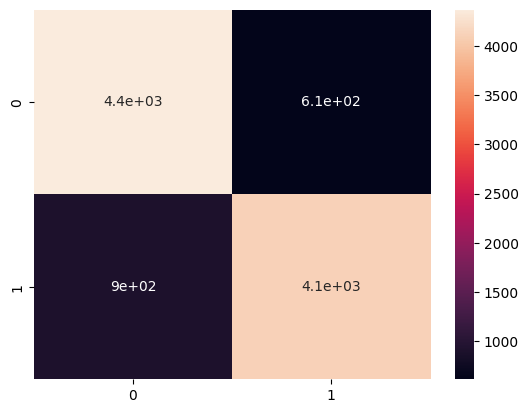

In [20]:
import seaborn as sns

sns.heatmap(cm, annot=True)
plt.show()

In [21]:
clf = Pipeline([

     ('vectorizer', CountVectorizer()),
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('KNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [22]:
y_pred = clf.predict(X_test)


print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.66      0.65      4982
    positive       0.65      0.63      0.64      5018

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



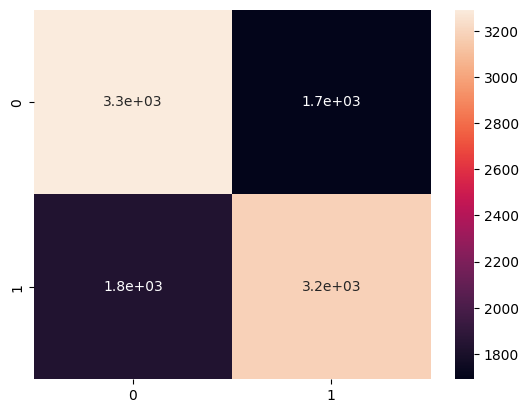

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

TRYING OUT RANDOM FOREST NOW

In [24]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [25]:
y_pred = clf.predict(X_test)


print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.84      0.84      4982
    positive       0.84      0.83      0.84      5018

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



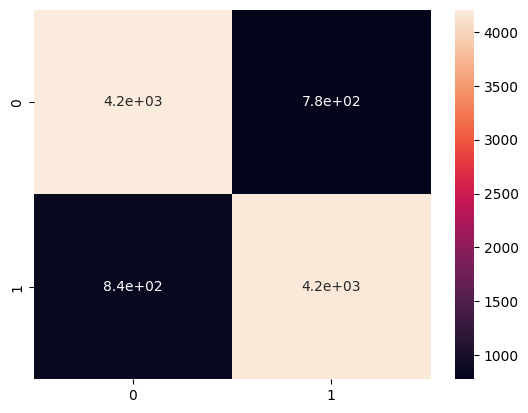

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
HENCE THE RANDOM FORESTS IS THE BEST MODEL FOR THIS DATASET